## 공공데이터를 이용한 카페 상권분석(2020 Ver.)


**들어가며**

- 공공데이터를 통해 대한민국을 이해해봅시다(?).
- 공공데이터포털(data.go.kr)에 다양한 데이터가 공개되어 있습니다.
- 그 중에 카페(라는 업종분류)들에 대해서 현황을 조사하려고 합니다.

**명세사항**
1. 전국 카페 데이터를 모두 수집해야합니다.
2. 지역별 or 브랜드별 점포 현황을 확인합니다.
3. 분석 결과를 시각화합니다. 



[데이터] https://www.data.go.kr/data/15083033/fileData.do

In [2]:
# 라이브러리를 불러옵니다.
import pandas as pd

## 1. 데이터 불러오기

In [3]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
temp = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_서울_202203.csv")

In [4]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
from glob import glob

# csv 목록 불러오기
file_names = glob("data/*.csv")
total = pd.DataFrame()

# 모든 csv 병합하기
for file_name in file_names:
    temp = pd.read_csv(file_name, low_memory=False)
    total = pd.concat([total, temp])
total
# reset index
total.reset_index(inplace=True)


In [5]:
# 분석에 필요한 column을 고릅니다. ## 자유롭게 하셔도 상관없습니다.
data = total[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '위도', '경도']]


In [6]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거합니다.
del total

## 2. 데이터 구경하기

#### 전국 커피 전문점 

In [7]:
# set(data["상권업종대분류명"])
set(data["상권업종중분류명"])

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 

In [8]:
# 카페만 뽑아냅니다.
df_coffee = data[data["상권업종중분류명"] == "커피점/카페"]
# index를 다시 세팅합니다.
df_coffee.index = range(len(df_coffee))

print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee

전국 커피 전문점 점포 수 :  106862


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,키즈까페아이사랑,NaN,음식,커피점/카페,강원도,강릉시,성덕동,37.759315,128.919456
1,힐링,NaN,음식,커피점/카페,강원도,원주시,단구동,37.319958,127.958442
2,드롭탑,속초엑스포점,음식,커피점/카페,강원도,속초시,조양동,38.191024,128.586322
3,상유재카페,NaN,음식,커피점/카페,강원도,정선군,정선읍,37.379458,128.660805
4,수정다방,NaN,음식,커피점/카페,강원도,고성군,거진읍,38.447977,128.456166
...,...,...,...,...,...,...,...,...,...
106857,칼디앤커피나무,NaN,음식,커피점/카페,충청북도,청주시 서원구,분평동,36.605920,127.487606
106858,라미커피,NaN,음식,커피점/카페,충청북도,청주시 서원구,산남동,36.608916,127.476073
106859,드롭탑청주다나여성병원점,청주다나여성병원점,음식,커피점/카페,충청북도,청주시 청원구,오근장동,36.671834,127.495750
106860,커피와사람들,NaN,음식,커피점/카페,충청북도,청주시 상당구,용암1동,36.610976,127.504643


#### 서울내 커피 전문점 

In [9]:
# 카페 중에 "서울"에 위치하고 있는 점포만 뽑아냅니다.
df_seoul_coffee = data[(data["상권업종중분류명"] == "커피점/카페") & (data["시도명"] == "서울특별시")]
df_seoul_coffee.index = range(len(df_seoul_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee

서울시 내 커피 전문점 점포 수 : 19422


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동,37.583149,127.000171
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동,37.658728,127.034746
2,우성커피숍,NaN,음식,커피점/카페,서울특별시,양천구,신월4동,37.522055,126.842935
3,버블베어,NaN,음식,커피점/카페,서울특별시,강서구,방화3동,37.580941,126.813358
4,로얄커피숍,NaN,음식,커피점/카페,서울특별시,강동구,성내2동,37.534901,127.124193
...,...,...,...,...,...,...,...,...,...
19417,코나카페,NaN,음식,커피점/카페,서울특별시,용산구,청파동,37.548116,126.969744
19418,토프레소태평로점,태평로점,음식,커피점/카페,서울특별시,중구,소공동,37.568684,126.975585
19419,비발디,NaN,음식,커피점/카페,서울특별시,도봉구,쌍문1동,37.651781,127.012964
19420,회화나무로스터스,NaN,음식,커피점/카페,서울특별시,서초구,양재1동,37.465820,127.022389


#### 전국 스타벅스

In [10]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_starbucks = df_coffee[df_coffee["상호명"].str.contains("스타벅스")]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks

전국 스타벅스 점포 수 : 1509


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,스타벅스강릉안목항점,강릉안목항점,음식,커피점/카페,강원도,강릉시,송정동,37.771400,128.948709
1,스타벅스춘천후평DT점,춘천후평DT점,음식,커피점/카페,강원도,춘천시,후평3동,37.879421,127.750622
2,스타벅스,춘천명동점,음식,커피점/카페,강원도,춘천시,약사명동,37.880037,127.727566
3,스타벅스설악워터피아점,설악워터피아점,음식,커피점/카페,강원도,속초시,영랑동,38.207735,128.527867
4,스타벅스,원주터미널점,음식,커피점/카페,강원도,원주시,무실동,37.343852,127.931104
...,...,...,...,...,...,...,...,...,...
1504,스타벅스,청주율량DT점,음식,커피점/카페,충청북도,청주시 청원구,율량.사천동,36.666270,127.492934
1505,스타벅스,충주연수점,음식,커피점/카페,충청북도,충주시,연수동,36.982734,127.939912
1506,스타벅스,NaN,음식,커피점/카페,충청북도,음성군,원남면,36.876466,127.654434
1507,스타벅스,NaN,음식,커피점/카페,충청북도,제천시,청전동,37.146806,128.210619


#### 서울 스타벅스

In [11]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_starbucks = df_starbucks[df_starbucks["시도명"] == "서울특별시"]
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks

서울시 내 스타벅스 점포 수 : 466


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동,37.582964,127.003887
1,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,서울특별시,서초구,서초3동,37.484386,127.014198
2,스타벅스,현대목동점,음식,커피점/카페,서울특별시,양천구,목1동,37.527147,126.874682
3,스타벅스미아사거리역점,미아사거리역점,음식,커피점/카페,서울특별시,강북구,송중동,37.611841,127.030685
4,스타벅스,가로수길점,음식,커피점/카페,서울특별시,강남구,신사동,37.523184,127.021629
...,...,...,...,...,...,...,...,...,...
461,스타벅스,선유도역1번출구점,음식,커피점/카페,서울특별시,영등포구,양평2동,37.538282,126.893648
462,스타벅스,서울역사점,음식,커피점/카페,서울특별시,용산구,남영동,37.554828,126.971712
463,스타벅스,도산사거리점,음식,커피점/카페,서울특별시,강남구,논현2동,37.519593,127.034097
464,스타벅스경복궁역,NaN,음식,커피점/카페,서울특별시,종로구,사직동,37.577173,126.972616


#### 전국 이디야

In [12]:
# 전국 이디야
df_ediya = df_coffee[df_coffee["상호명"].str.contains("이디야")]
df_ediya.index = range(len(df_ediya))
print('전국 이디야 점포 수 :', len(df_ediya))
df_ediya

전국 이디야 점포 수 : 2117


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,이디야커피,원주반곡동점,음식,커피점/카페,강원도,원주시,반곡관설동,37.338668,127.967776
1,이디야커피,춘천제일점,음식,커피점/카페,강원도,춘천시,강남동,37.862232,127.719847
2,이디야커피,흥업점,음식,커피점/카페,강원도,원주시,흥업면,37.303745,127.919939
3,이디야커피,정동진역점,음식,커피점/카페,강원도,강릉시,강동면,37.691349,129.032807
4,이디야커피,속초동명항점,음식,커피점/카페,강원도,속초시,동명동,38.211932,128.599416
...,...,...,...,...,...,...,...,...,...
2112,이디야커피,제천장락중앙점,음식,커피점/카페,충청북도,제천시,교동,37.148963,128.223898
2113,이디야커피,제천의림지DI점,음식,커피점/카페,충청북도,제천시,의림지동,37.176999,128.208056
2114,이디야커피청주분평점,청주분평점,음식,커피점/카페,충청북도,청주시 흥덕구,봉명2.송정동,36.646211,127.462411
2115,이디야커피,충주문화점,음식,커피점/카페,충청북도,충주시,문화동,36.967585,127.924010


#### 서울 이디야

In [13]:
# 서울 이디야
df_seoul_ediya = df_ediya[df_ediya["시도명"] == "서울특별시"]
df_seoul_ediya.index = range(len(df_seoul_ediya))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_ediya))
df_seoul_ediya

서울시 내 스타벅스 점포 수 : 427


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,이디야커피,신길역점,음식,커피점/카페,서울특별시,영등포구,신길1동,37.515118,126.918062
1,이디야커피,라이프점,음식,커피점/카페,서울특별시,영등포구,여의동,37.519544,126.939198
2,이디야커피양재AT점,양재AT점,음식,커피점/카페,서울특별시,서초구,양재2동,37.469075,127.040265
3,이디야커피,시흥점,음식,커피점/카페,서울특별시,금천구,시흥2동,37.449066,126.913646
4,이디야커피,개봉중앙점,음식,커피점/카페,서울특별시,구로구,개봉3동,37.486436,126.854872
...,...,...,...,...,...,...,...,...,...
422,이디야커피,방배백석점,음식,커피점/카페,서울특별시,서초구,방배3동,37.478714,126.999766
423,이디야커피,강북경찰서점,음식,커피점/카페,서울특별시,강북구,번1동,37.636868,127.026984
424,이디야커피,만리동고개점,음식,커피점/카페,서울특별시,중구,중림동,37.554739,126.964594
425,이디야커피,문정문현점,음식,커피점/카페,서울특별시,송파구,장지동,37.480126,127.126630


#### 전국 커피빈 

In [14]:
# 전국 커피빈
df_coffeebean = df_coffee[df_coffee["상호명"].str.contains("커피빈")]
df_coffeebean.index = range(len(df_coffeebean))
print('전국 커피빈 점포 수 :', len(df_coffeebean))
df_coffeebean

전국 커피빈 점포 수 : 255


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,커피빈,NaN,음식,커피점/카페,강원도,동해시,묵호동,37.552715,129.118963
1,커피빈,코리아원주AK플라자점,음식,커피점/카페,강원도,원주시,단계동,37.345679,127.927626
2,베가커피빈스,NaN,음식,커피점/카페,경기도,수원시 장안구,율천동,37.298550,126.966763
3,커피빈,현대프리미엄아울렛김포점,음식,커피점/카페,경기도,김포시,고촌읍,37.597097,126.785052
4,커피빈,중동현대백화점U-PLEX점,음식,커피점/카페,경기도,부천시,신중동,37.504463,126.760836
...,...,...,...,...,...,...,...,...,...
250,커피빈,코리아제주아라점,음식,커피점/카페,제주특별자치도,제주시,아라동,33.484713,126.534387
251,커피빈,코리아천안신부동점,음식,커피점/카페,충청남도,천안시 동남구,신안동,36.818596,127.157384
252,커피빈,NaN,음식,커피점/카페,충청남도,금산군,금산읍,36.102530,127.490717
253,커피빈,코리아청주점,음식,커피점/카페,충청북도,청주시 상당구,성안동,36.634532,127.489295


#### 서울 커피빈 

In [15]:
# 서울 커피빈
df_seoul_coffeebean = df_coffeebean[df_coffeebean["시도명"] == "서울특별시"]
df_seoul_coffeebean.index = range(len(df_seoul_coffeebean))
print('서울시 내 커피빈 점포 수 :', len(df_seoul_coffeebean))
df_seoul_coffeebean

서울시 내 커피빈 점포 수 : 147


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동,37.583149,127.000171
1,커피빈코리아낙성대역점,코리아낙성대역점,음식,커피점/카페,서울특별시,관악구,행운동,37.478106,126.961593
2,커피빈,코리아청담에스점,음식,커피점/카페,서울특별시,강남구,청담동,37.525250,127.047216
3,커피빈,코리아강남역랭기지타워점,음식,커피점/카페,서울특별시,강남구,역삼1동,37.496520,127.030075
4,커피빈,코리아청담성당점,음식,커피점/카페,서울특별시,강남구,청담동,37.519902,127.050021
...,...,...,...,...,...,...,...,...,...
142,커피빈,코리아서초동점,음식,커피점/카페,서울특별시,서초구,서초3동,37.486689,127.010515
143,커피빈,코리아을지로입구역점,음식,커피점/카페,서울특별시,중구,명동,37.566867,126.983228
144,커피빈,길동별,음식,커피점/카페,서울특별시,강동구,길동,37.536955,127.139999
145,커피빈,서초우성아파트앞점,음식,커피점/카페,서울특별시,서초구,서초2동,37.492721,127.028337


#### 전국 투썸 

In [16]:
# 전국 투썸
df_2some = df_coffee[df_coffee["상호명"].str.contains("투썸")]
df_2some.index = range(len(df_2some))
print('전국 투썸 점포 수 :', len(df_2some))
df_2some

전국 투썸 점포 수 : 1074


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,투썸플레이스,춘천명동점,음식,커피점/카페,강원도,춘천시,조운동,37.879849,127.728113
1,투썸플레이스,소양강댐점,음식,커피점/카페,강원도,춘천시,신북읍,37.932194,127.792251
2,투썸플레이스,용평리조트점,음식,커피점/카페,강원도,평창군,대관령면,37.650953,128.705542
3,투썸플레이스,철원와수점,음식,커피점/카페,강원도,철원군,서면,38.237188,127.437416
4,투썸플레이스동해중앙점,동해중앙점,음식,커피점/카페,강원도,동해시,천곡동,37.521726,129.115411
...,...,...,...,...,...,...,...,...,...
1069,투썸플레이스,청주방서메디컬타워점,음식,커피점/카페,충청북도,청주시 상당구,용암2동,36.598215,127.504646
1070,투썸플레이스,청주오송생명과학단지점,음식,커피점/카페,충청북도,청주시 흥덕구,오송읍,36.631109,127.329612
1071,투썸플레이스,제천고암케이원점,음식,커피점/카페,충청북도,제천시,의림지동,37.159169,128.221068
1072,투썸플레이스,청주메가폴리스점,음식,커피점/카페,충청북도,청주시 흥덕구,가경동,36.626560,127.432258


#### 서울 투썸 

In [17]:
# 서울 투썸
df_seoul_2some = df_2some[df_2some["시도명"] == "서울특별시"]
df_seoul_2some.index = range(len(df_seoul_2some))
print('서울시 내 투썸 점포 수 :', len(df_seoul_2some))
df_seoul_2some

서울시 내 투썸 점포 수 : 244


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,투썸플레이스서울대역중앙점,서울대역중앙점,음식,커피점/카페,서울특별시,관악구,중앙동,37.481879,126.952190
1,투썸플레이스,씨제이프레시웨이강남세브란스병원점,음식,커피점/카페,서울특별시,강남구,도곡1동,37.492795,127.046294
2,투썸플레이스,LG광화문빌딩점,음식,커피점/카페,서울특별시,종로구,사직동,37.569262,126.971558
3,투썸플레이스,가락시장역점,음식,커피점/카페,서울특별시,송파구,가락본동,37.493986,127.120826
4,투썸플레이스,CGV수유,음식,커피점/카페,서울특별시,강북구,수유3동,37.642396,127.029790
...,...,...,...,...,...,...,...,...,...
239,투썸플레이스,가락몰점,음식,커피점/카페,서울특별시,송파구,가락1동,37.494526,127.108696
240,투썸플레이스,선릉로점,음식,커피점/카페,서울특별시,강남구,역삼1동,37.504258,127.044293
241,투썸플레이스,서울숲역점,음식,커피점/카페,서울특별시,성동구,성수1가1동,37.542687,127.045183
242,투썸플레이스,구로항동점,음식,커피점/카페,서울특별시,구로구,항동,37.479734,126.822966


#### 전국 빽다방 

In [18]:
# 전국 빽다방
df_bbaek = df_coffee[df_coffee["상호명"].str.contains("빽다방")]
df_bbaek.index = range(len(df_bbaek))
print('전국 빽다방 점포 수 :', len(df_bbaek))
df_bbaek

전국 빽다방 점포 수 : 782


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,빽다방,춘천석사CGV점,음식,커피점/카페,강원도,춘천시,석사동,37.851125,127.744832
1,빽다방동해천곡점,동해천곡점,음식,커피점/카페,강원도,동해시,천곡동,37.522259,129.115250
2,빽다방,원주중앙1호점,음식,커피점/카페,강원도,원주시,일산동,37.349835,127.947939
3,빽다방,삼척대학로점,음식,커피점/카페,강원도,삼척시,성내동,37.443289,129.163179
4,빽다방,홍천중앙점,음식,커피점/카페,강원도,홍천군,홍천읍,37.691563,127.884679
...,...,...,...,...,...,...,...,...,...
777,빽다방,청주동남점,음식,커피점/카페,충청북도,청주시 상당구,용암1동,36.616984,127.516980
778,빽다방,NaN,음식,커피점/카페,충청북도,진천군,덕산읍,36.902431,127.533623
779,빽다방,청주테크노폴리스점,음식,커피점/카페,충청북도,청주시 흥덕구,강서2동,36.667319,127.452923
780,빽다방,NaN,음식,커피점/카페,충청북도,청주시 청원구,율량.사천동,36.659864,127.510560


#### 서울 빽다방 

In [19]:
# 서울 빽다방
df_seoul_bbaek = df_bbaek[df_bbaek["시도명"] == "서울특별시"]
df_seoul_bbaek.index = range(len(df_seoul_bbaek))
print('서울시 내 빽다방 점포 수 :', len(df_seoul_bbaek))
df_seoul_bbaek

서울시 내 빽다방 점포 수 : 156


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,빽다방공덕새창로점,공덕새창로점,음식,커피점/카페,서울특별시,마포구,도화동,37.542228,126.951822
1,빽다방서초우성점,서초우성점,음식,커피점/카페,서울특별시,서초구,서초2동,37.493026,127.029306
2,빽다방중계은행사거리점,중계은행사거리점,음식,커피점/카페,서울특별시,노원구,중계1동,37.648789,127.076327
3,빽다방성신여대점,성신여대점,음식,커피점/카페,서울특별시,성북구,동선동,37.591966,127.016766
4,빽다방신림역1호점,신림역1호점,음식,커피점/카페,서울특별시,관악구,서원동,37.483686,126.927572
...,...,...,...,...,...,...,...,...,...
151,빽다방,창동역점,음식,커피점/카페,서울특별시,도봉구,창4동,37.653501,127.050135
152,빽다방,올림픽북단점,음식,커피점/카페,서울특별시,광진구,구의3동,37.540449,127.095227
153,빽다방,선유도역점,음식,커피점/카페,서울특별시,영등포구,양평2동,37.537811,126.894357
154,빽다방,구로KT점,음식,커피점/카페,서울특별시,관악구,조원동,37.480106,126.903733


#### 전국 할리스 

In [20]:
# 전국 할리스
df_hollys = df_coffee[df_coffee["상호명"].str.contains("할리스")]
df_hollys.index = range(len(df_hollys))
print('전국 할리스 점포 수 :', len(df_hollys))
df_hollys

전국 할리스 점포 수 : 560


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,할리스커피,중앙점,음식,커피점/카페,강원도,원주시,중앙동,37.349223,127.949960
1,할리스커피동해묵호점,동해묵호점,음식,커피점/카페,강원도,동해시,천곡동,37.535023,129.114772
2,할리스커피강릉점,강릉점,음식,커피점/카페,강원도,강릉시,중앙동,37.753663,128.896360
3,할리스커피,강릉휴게소인천방면,음식,커피점/카페,강원도,강릉시,성산면,37.759648,128.804993
4,할리스,NaN,음식,커피점/카페,강원도,강릉시,송정동,37.772381,128.951014
...,...,...,...,...,...,...,...,...,...
555,할리스커피,괴산휴게소창원방면,음식,커피점/카페,충청북도,괴산군,장연면,36.831415,127.957867
556,할리스,명암레이크,음식,커피점/카페,충청북도,청주시 상당구,용담.명암.산성동,36.638526,127.511098
557,할리스커피,청주성모병원점,음식,커피점/카페,충청북도,청주시 청원구,오근장동,36.673530,127.485603
558,할리스,충북진천점,음식,커피점/카페,충청북도,진천군,진천읍,36.858834,127.440156


#### 서울 할리스 

In [21]:
# 서울 할리스
df_seoul_hollys = df_hollys[df_hollys["시도명"] == "서울특별시"]
df_seoul_hollys.index = range(len(df_seoul_hollys))
print('서울시 내 할리스 점포 수 :', len(df_seoul_hollys))
df_seoul_hollys

서울시 내 할리스 점포 수 : 140


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,할리스커피남부터미널,NaN,음식,커피점/카페,서울특별시,서초구,서초1동,37.486724,127.015739
1,할리스커피마포역점,마포역점,음식,커피점/카페,서울특별시,마포구,용강동,37.539571,126.945907
2,할리스커피,목동예술인회관점,음식,커피점/카페,서울특별시,양천구,목1동,37.527064,126.870735
3,할리스커피,르네상스사거리점,음식,커피점/카페,서울특별시,강남구,역삼2동,37.502043,127.042195
4,할리스,도심공항점2,음식,커피점/카페,서울특별시,강남구,삼성1동,37.510348,127.061013
...,...,...,...,...,...,...,...,...,...
135,할리스,백석예술대점,음식,커피점/카페,서울특별시,서초구,방배3동,37.480366,126.996884
136,할리스,응암점,음식,커피점/카페,서울특별시,은평구,신사1동,37.598637,126.915314
137,할리스커피,전경련회관점,음식,커피점/카페,서울특별시,영등포구,여의동,37.522171,126.919895
138,할리스커피,공덕역북카페점,음식,커피점/카페,서울특별시,마포구,아현동,37.544522,126.951348


#### 전국 메가커피

In [22]:
# 전국 메가커피
df_mega = df_coffee[df_coffee["상호명"].str.contains("메가커피")]
df_mega.index = range(len(df_mega))
print('전국 메가커피 점포 수 :', len(df_mega))
df_mega

전국 메가커피 점포 수 : 453


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,메가커피인제점,인제점,음식,커피점/카페,강원도,인제군,인제읍,38.068862,128.172229
1,메가커피,와수리점,음식,커피점/카페,강원도,철원군,서면,38.238849,127.438054
2,메가커피,화천사창리점,음식,커피점/카페,강원도,화천군,사내면,38.071663,127.521328
3,메가커피철원문혜리점,철원문혜리점,음식,커피점/카페,강원도,철원군,갈말읍,38.185449,127.320582
4,메가커피,강릉포남점,음식,커피점/카페,강원도,강릉시,포남1동,37.770216,128.912667
...,...,...,...,...,...,...,...,...,...
448,메가커피,청주오창2산업단지점,음식,커피점/카페,충청북도,청주시 청원구,오창읍,36.732350,127.451051
449,메가커피,청주지웰시티점,음식,커피점/카페,충청북도,청주시 흥덕구,복대1동,36.642332,127.426909
450,메가커피,금곡중앙점,음식,커피점/카페,충청북도,진천군,진천읍,36.859080,127.438831
451,메가커피,청주테크노폴리스점,음식,커피점/카페,충청북도,청주시 흥덕구,강서2동,36.666145,127.450470


#### 서울 메가커피 

In [23]:
# 서울 메가커피
df_seoul_mega = df_mega[df_mega["시도명"] == "서울특별시"]
df_seoul_mega.index = range(len(df_seoul_mega))
print('서울시 내 메가커피 점포 수 :', len(df_seoul_mega))
df_seoul_mega

서울시 내 메가커피 점포 수 : 84


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,메가커피,아차산역점,음식,커피점/카페,서울특별시,광진구,중곡4동,37.552647,127.090134
1,메가커피,신설동역점,음식,커피점/카페,서울특별시,동대문구,용신동,37.576200,127.023642
2,메가커피,개봉사거리점,음식,커피점/카페,서울특별시,구로구,개봉1동,37.497108,126.856168
3,메가커피,동대문점,음식,커피점/카페,서울특별시,중구,광희동,37.567824,127.007835
4,메가커피,방학도깨비시장점,음식,커피점/카페,서울특별시,도봉구,방학2동,37.665135,127.036000
...,...,...,...,...,...,...,...,...,...
79,메가커피.에이치비지니,스파크점,음식,커피점/카페,서울특별시,송파구,문정2동,37.484941,127.116217
80,메가커피문정,아이파크점,음식,커피점/카페,서울특별시,송파구,문정2동,37.482309,127.122093
81,메가커피,잠실레이크팰리스점,음식,커피점/카페,서울특별시,송파구,삼전동,37.507008,127.092487
82,메가커피,신대방삼거리역점,음식,커피점/카페,서울특별시,동작구,대방동,37.499457,126.927878


## 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**2020년 12월 기준 커피전문점 평판 순위**

(sorce : http://cnews.thebigdata.co.kr/view.php?ud=20210107084318797607d270612f_23)

1. 스타벅스
2. 투썸플레이스
3. 이디야
4. 메가커피
5. 커피빈

**변수**

- 전체 점포 : data
- 전체/서울 커피전문점 : df_coffee / df_seoul_starbucks



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 커피빈 : df_coffeebean / df_seoul_coffeebean
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek
- 전체/서울 할리스 : df_hollys / df_seoul_hollys
- 전체/서울 메가커피 : df_mega / df_seoul_mega

### 1) 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [24]:
print("**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****")
print("주요 5대 커피브랜드 전국 입점 비율 : %.3f%%" % ((len(df_starbucks)+len(df_2some)+len(df_ediya)+len(df_mega)+len(df_coffeebean)) / len(df_coffee)*100))
print("1. 스타벅스 : %.3f%%" % (len(df_starbucks) / len(df_coffee)*100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_2some) / len(df_coffee)*100))
print("3. 이디야 : %.3f%%" % (len(df_ediya) / len(df_coffee)*100))
print("4. 메가커피 : %.3f%%" % (len(df_mega) / len(df_coffee)*100))
print("5. 커피빈 : %.3f%%" % (len(df_coffeebean) / len(df_coffee)*100))


**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****
주요 5대 커피브랜드 전국 입점 비율 : 5.061%
1. 스타벅스 : 1.412%
2. 투썸플레이스 : 1.005%
3. 이디야 : 1.981%
4. 메가커피 : 0.424%
5. 커피빈 : 0.239%


### 2) 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [25]:
print("스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_seoul_coffee)*100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_seoul_coffee)*100))
print("커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_seoul_coffee)*100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_seoul_coffee)*100))
print("빽다방 : %.3f%%" % (len(df_seoul_bbaek) / len(df_seoul_coffee)*100))
print("할리스 : %.3f%%" % (len(df_seoul_hollys) / len(df_seoul_coffee)*100))
print("메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_seoul_coffee)*100))


스타벅스 : 2.399%
이디야 : 2.199%
커피빈 : 0.757%
투썸플레이스 : 1.256%
빽다방 : 0.803%
할리스 : 0.721%
메가커피 : 0.432%


### 3) 각 커피브랜드별 서울 입점 비율 

In [26]:
print("**** 주요 5대 커피브랜드별 서울 입점 비율 ****")
print("1. 스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_starbucks) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_2some) * 100))
print("3. 이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_ediya) * 100))
print("4. 메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_mega) * 100))
print("5. 커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_coffeebean) * 100))


**** 주요 5대 커피브랜드별 서울 입점 비율 ****
1. 스타벅스 : 30.881%
2. 투썸플레이스 : 22.719%
3. 이디야 : 20.170%
4. 메가커피 : 18.543%
5. 커피빈 : 57.647%


In [27]:
# 각 구별로 스타벅스가 얼마나 있는지 확인합니다.
starbucks_gu = df_seoul_starbucks.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
starbucks_gu = starbucks_gu.reset_index()
starbucks_gu = starbucks_gu.set_index('시군구명')
# starbucks_gu

In [28]:
# 시각화를 위한 라이브러리를 불러옵니다.
import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline

In [29]:
#### Windows10 사용자는 해당 코드가 필요없습니다!

# macos에서 사용가능한 한글 글꼴 확인 코드
[f.name for f in font_manager.fontManager.ttflist if 'Neo' in f.name]

[]

In [30]:
## 운영체제별 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'Apple SD Gothic Neo'
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

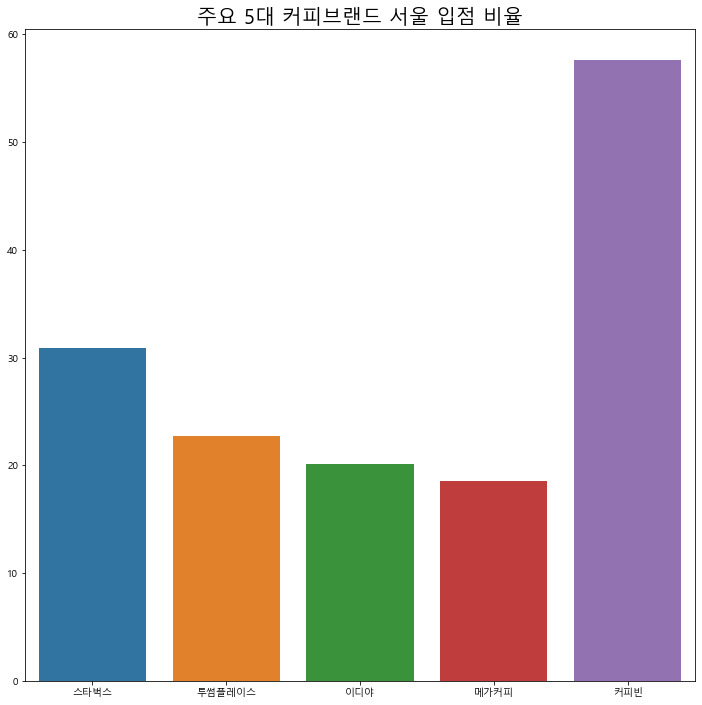

In [31]:
# 주요 5대 커피브랜드 서울 입점 비율을 시각화합니다.
starbucks_rate = (len(df_seoul_starbucks) / len(df_starbucks) * 100)
twosome_rate = (len(df_seoul_2some) / len(df_2some) * 100)
ediya_rate = (len(df_seoul_ediya) / len(df_ediya) * 100)
mega_rate = (len(df_seoul_mega) / len(df_mega) * 100)
coffeebean_rate = (len(df_seoul_coffeebean) / len(df_coffeebean) * 100)

x = ["스타벅스", "투썸플레이스", "이디야", "메가커피", "커피빈"]
y = [starbucks_rate, twosome_rate, ediya_rate, mega_rate, coffeebean_rate]

plt.figure(figsize=(12, 12))
plt.title("주요 5대 커피브랜드 서울 입점 비율", fontdict={"fontsize" : 20})
sns.barplot(x=x, y=y)
plt.savefig("coffe_barplot.png")
plt.show()

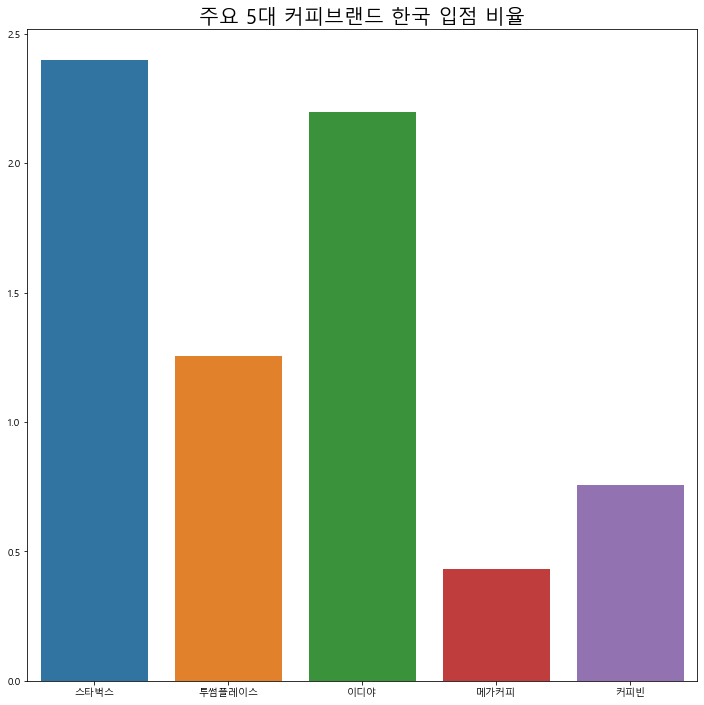

In [32]:
starbucks_rate2 = (len(df_seoul_starbucks) / len(df_seoul_coffee)*100)
twosome_rate2 = (len(df_seoul_2some) / len(df_seoul_coffee)*100)
ediya_rate2 = (len(df_seoul_ediya) / len(df_seoul_coffee)*100)
mega_rate2 = (len(df_seoul_mega) / len(df_seoul_coffee)*100)
coffeebean_rate2 = (len(df_seoul_coffeebean) / len(df_seoul_coffee)*100)

x = ["스타벅스", "투썸플레이스", "이디야", "메가커피", "커피빈"]
y = [starbucks_rate2, twosome_rate2, ediya_rate2, mega_rate2, coffeebean_rate2]

plt.figure(figsize=(12, 12))
plt.title("주요 5대 커피브랜드 한국 입점 비율", fontdict={"fontsize" : 20})
sns.barplot(x=x, y=y)
plt.savefig("coffe_barplot.png")
plt.show()

### (Challenge) More Prettier!

In [39]:
# 위의 barplot을 seaborn을 이용하여 더욱 멋지게 시각화해보세요!
# Leaflet.js - 지도 관련 라이브러리

# Folium - 인터렉티브 지도 시각화 라이브러리
import folium
lat = df_coffee['위도'].mean()
long = df_coffee['경도'].mean()
m = folium.Map([lat, long], zoom_start=9, width=750, height=500)
m